In [17]:
# First cell with corrected imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import torch
import sys
from pathlib import Path
import os

# Add the project root directory to Python path
project_root = str(Path.cwd().parent) if 'notebooks' in str(Path.cwd()) else str(Path.cwd())
if project_root not in sys.path:
    sys.path.append(project_root)

# Import custom functions
from src.preprocessing import preprocess_data
from src.plots import plot_distributions, plot_correlations, plot_learning_curves
from src.model import EnhancedFraudDetector, train_model




In [18]:
# Load the dataset
data = pd.read_csv(r"C:\Users\ELITEBOOK\OneDrive\Desktop\Projects\Fraud-Detection-System\data\raw\creditcard_2023.csv")

# Display basic information
print("Dataset Shape:", data.shape)
print("\nFeature Information:")
data.info()

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Display class distribution
print("\nClass Distribution:")
class_dist = data['Class'].value_counts(normalize=True)
print(class_dist)

Dataset Shape: (568630, 31)

Feature Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20

In [19]:
# Plot feature distributions
plt.figure(figsize=(15, 10))
plot_distributions(data)
plt.tight_layout()

# Save the file in the reports folder
reports_dir = r'C:\Users\ELITEBOOK\OneDrive\Desktop\Projects\Fraud-Detection-System\reports'
file_path = os.path.join(reports_dir, 'feature_distributions.png')
plt.savefig(file_path)
plt.close()

<Figure size 1500x1000 with 0 Axes>

In [20]:
# Plot correlation matrix
plt.figure(figsize=(12, 8))
plot_correlations(data)
plt.tight_layout()

# Save the file in the reports folder
reports_dir = r'C:\Users\ELITEBOOK\OneDrive\Desktop\Projects\Fraud-Detection-System\reports'
file_path = os.path.join(reports_dir, 'correlation_matrix.png')
plt.savefig(file_path)
plt.close()

<Figure size 1200x800 with 0 Axes>

In [22]:
# Preprocess the data
X_train, X_test, y_train, y_test = preprocess_data(data)

# Save processed datasets
processed_dir = r'C:\Users\ELITEBOOK\OneDrive\Desktop\Projects\Fraud-Detection-System\reports'
X_train.to_csv(os.path.join(processed_dir, 'X_train.csv'), index=False)
X_test.to_csv(os.path.join(processed_dir, 'X_test.csv'), index=False)
y_train.to_csv(os.path.join(processed_dir, 'y_train.csv'), index=False)
y_test.to_csv(os.path.join(processed_dir, 'y_test.csv'), index=False)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Display class balance in train and test sets
print("\nTraining set class distribution:")
print(pd.Series(y_train).value_counts(normalize=True))
print("\nTest set class distribution:")
print(pd.Series(y_test).value_counts(normalize=True))


Training set shape: (454904, 30)
Testing set shape: (113726, 30)

Training set class distribution:
Class
0    0.5
1    0.5
Name: proportion, dtype: float64

Test set class distribution:
Class
1    0.5
0    0.5
Name: proportion, dtype: float64


In [24]:
# Train the model
model, history = train_model(
    X_train, 
    X_test, 
    y_train, 
    y_test,
    epochs=100,
    batch_size=32
)

# Plot learning curves
plot_learning_curves(history)
reports_dir = r'C:\Users\ELITEBOOK\OneDrive\Desktop\Projects\Fraud-Detection-System\reports'
file_path = os.path.join(reports_dir, 'learning_curves.png')
plt.savefig(file_path)
plt.close()

Epoch 10/100:
Loss: 0.0018
Val AUC: 1.0000
Epoch 20/100:
Loss: 0.0017
Val AUC: 1.0000
Epoch 30/100:
Loss: 0.0015
Val AUC: 1.0000
Epoch 40/100:
Loss: 0.0015
Val AUC: 1.0000
Epoch 50/100:
Loss: 0.0019
Val AUC: 1.0000
Epoch 60/100:
Loss: 0.0015
Val AUC: 1.0000
Epoch 70/100:
Loss: 0.0014
Val AUC: 1.0000
Epoch 80/100:
Loss: 0.0013
Val AUC: 1.0000
Epoch 90/100:
Loss: 0.0015
Val AUC: 1.0000
Epoch 100/100:
Loss: 0.0016
Val AUC: 1.0000


In [25]:
# Evaluate model on test set
model.eval()
with torch.no_grad():
    X_test_tensor = torch.FloatTensor(X_test.values)
    y_pred = model(X_test_tensor).squeeze().numpy()
    y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate and display metrics
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))

print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    confusion_matrix(y_test, y_pred_binary), 
    annot=True, 
    fmt='d',
    xticklabels=['Normal', 'Fraud'],
    yticklabels=['Normal', 'Fraud']
)
plt.title('Confusion Matrix')
reports_dir = r'C:\Users\ELITEBOOK\OneDrive\Desktop\Projects\Fraud-Detection-System\reports'
file_path = os.path.join(reports_dir, 'confusion_matrix.png')
plt.savefig(file_path)
plt.close()


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726


ROC-AUC Score: 0.9999563750335707


C:\Users\ELITEBOOK\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<Figure size 1000x600 with 0 Axes>

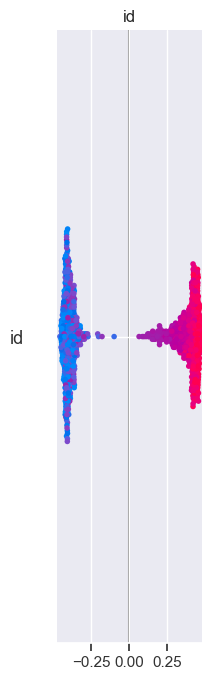

In [26]:
import shap

# Create SHAP explainer
background = X_train.sample(100, random_state=42)  # Sample background data
explainer = shap.DeepExplainer(model, torch.FloatTensor(background.values))

# Calculate SHAP values for a sample of test data
test_sample = X_test.sample(1000, random_state=42)
shap_values = explainer.shap_values(torch.FloatTensor(test_sample.values))

# Plot feature importance
plt.figure(figsize=(10, 6))
shap.summary_plot(
    shap_values, 
    test_sample, 
    feature_names=X_test.columns,
    plot_type='bar'
)
plt.tight_layout()
reports_dir = r'C:\Users\ELITEBOOK\OneDrive\Desktop\Projects\Fraud-Detection-System\reports'
file_path = os.path.join(reports_dir, 'feature_importance.png')
plt.savefig(file_path)
plt.close()

In [28]:
# Save the trained model
models_dir = r'C:\Users\ELITEBOOK\OneDrive\Desktop\Projects\Fraud-Detection-System\models'
file_path = os.path.join(models_dir, 'fraud_detector_model.pth')
torch.save(model.state_dict(), file_path)